In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 1. ReLU
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# 2. ELU
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, elu(x, alpha) + alpha)

# 3. SiLU
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def silu(x):
    return x * sigmoid(x)

def silu_derivative(x):
    sig = sigmoid(x)
    return sig + x * sig * (1 - sig)

# 4. Mish
def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

def mish_derivative(x):
    omega = np.log1p(np.exp(x))
    delta = np.tanh(omega)
    return delta + x * (1 - delta**2) * (1 / (1 + np.exp(-x)))

# 5. Swish
class Swish:
    def __init__(self, beta=1.0):
        self.beta = beta  # Параметр β

    def __call__(self, x):
        return x * sigmoid(self.beta * x)

    def derivative(self, x):
        sig = sigmoid(self.beta * x)
        return sig + self.beta * x * sig * (1 - sig)

swish = Swish(beta=1.5)

In [32]:
# Функція для побудови графіків
def plot_activation_and_derivative(x, activation_func, derivative_func, title):
    y = activation_func(x)
    dy = derivative_func(x)
    
    plt.figure(figsize=(10, 5))
    
    # Графік функції
    plt.subplot(1, 2, 1)
    plt.plot(x, y, label=f'{title}')
    plt.title(f'{title}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    
    # Графік похідної
    plt.subplot(1, 2, 2)
    plt.plot(x, dy, label=f'{title} derivative', color='r')
    plt.title(f'{title} Derivative')
    plt.xlabel('x')
    plt.ylabel('f\'(x)')
    plt.grid(True)
    
    plt.show()

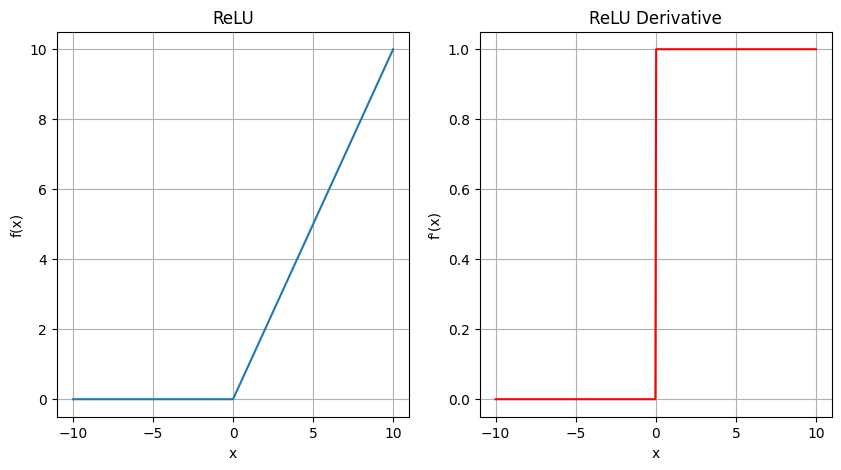

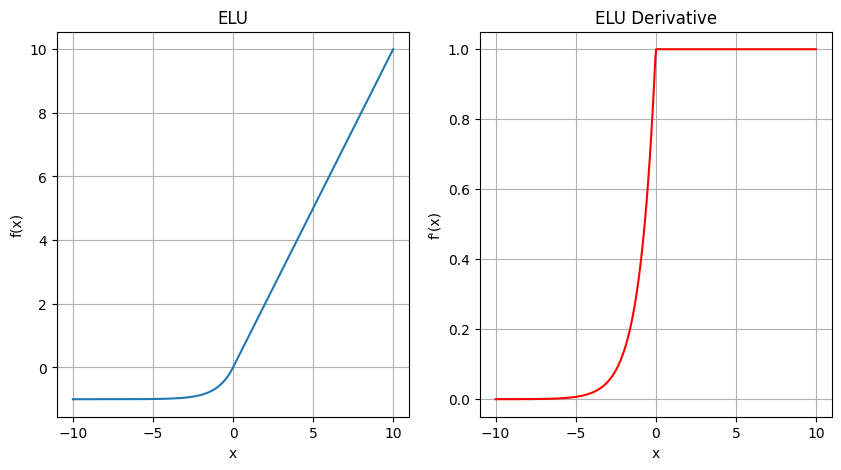

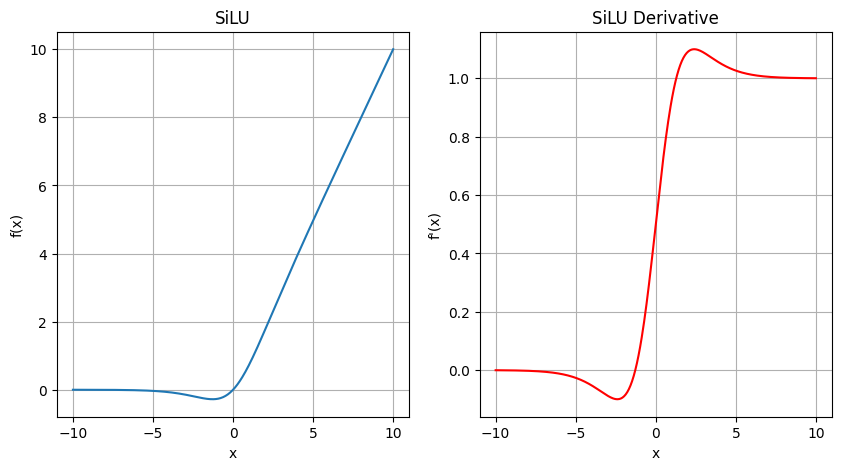

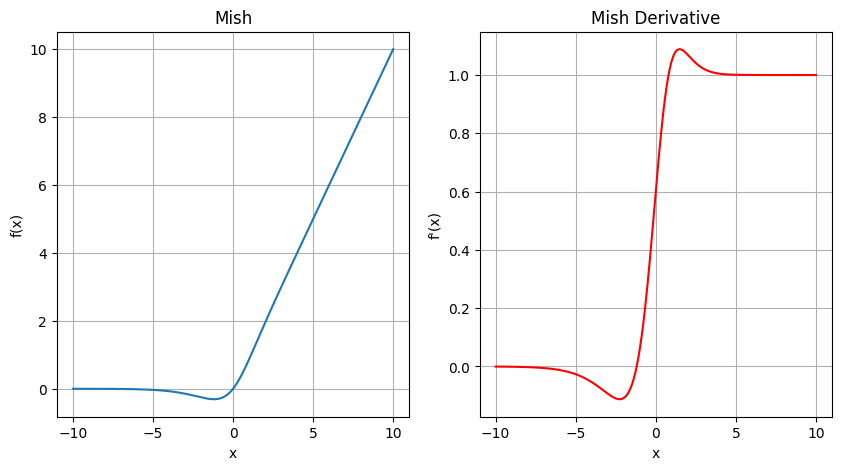

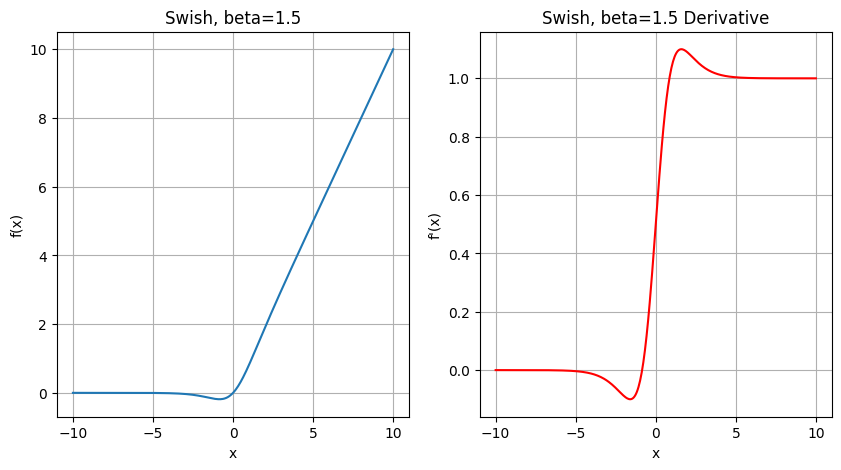

In [33]:
# Діапазон значень
x = np.linspace(-10, 10, 400)

# Візуалізуємо функції та їх похідні
plot_activation_and_derivative(x, relu, relu_derivative, "ReLU")
plot_activation_and_derivative(x, elu, elu_derivative, "ELU")
plot_activation_and_derivative(x, silu, silu_derivative, "SiLU")
plot_activation_and_derivative(x, mish, mish_derivative, "Mish")
plot_activation_and_derivative(x, swish, swish.derivative, "Swish, beta=1.5")

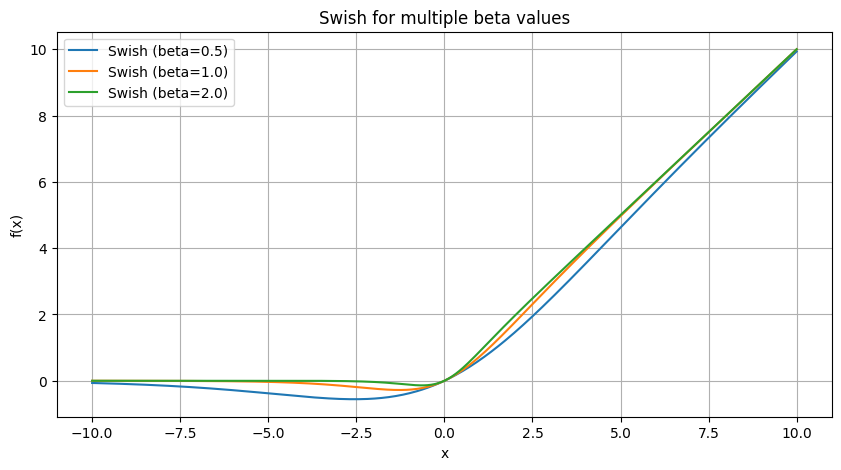

In [34]:
def plot_multiple_swish(x, betas):
    plt.figure(figsize=(10, 5))

    for beta in betas:
        swish_func = Swish(beta=beta)
        y = swish_func(x)
        plt.plot(x, y, label=f'Swish (beta={beta})')

    plt.title('Swish for multiple beta values')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
betas = [0.5, 1.0, 2.0]


plot_multiple_swish(x, betas)